# Introduction
This project will highlight a complete and thorough analysis of pizza sales at Regork. This analysis will highlight pizza trends by time, products bought with pizza and pizza trends by demographic. After explaining and visualising these trends I will describe reccomendations for Regork.

### Data used
For this report I used three data sets that the complete journey package offers:

**Transaction data:** Tracks every transaction in 2017.

**Products data:** Describes every product sold including their product type and category

**Demographic data:** Provides information about our customers

Using these data sets, I will make tables and plot several graphs regarding the three subjects of purchase correlation, time trends, and demographic trends.

### Synopsis
This report will point out potential areas in profit growth for anything related to pizza sales. I will point out the highs and lows and see where I can capitalize and improve upon. I will suggest the use of marketing tactics for demographic areas, time frames, and for products affiliated with pizza. I will suggest the use of coupons and potential product placements. I believe that these tactics will generate growth for this category and products correlated with it.

# Packages Needed

In [1]:
from completejourney_py import get_data # data sets
import pandas as pd ## data manipulating tool
import matplotlib.pyplot as plt # visualizations
# Our main plotting package (must have explicit import of submodules)
import bokeh.io
import bokeh.models # interactive visulualizations
import bokeh.plotting
import bokeh.transform
import numpy as n # data manipulation
# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
cj_data = get_data()
transactions = cj_data['transactions']
demographics = cj_data['demographics']
products = cj_data['products']

# Exploratory Data Analysis
### Time Trends
Another important key pattern to analyze is the monthly trends of pizza sales.We can greatly benefit from a potential time trends in pizza sales if we know common consumer patterns. Pizza is usually known as a party food, so it will be interesting to see what months lead in sales.



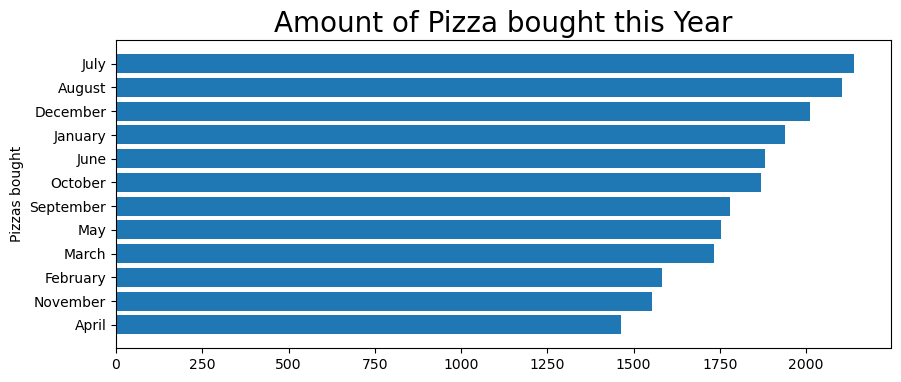

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))
df = products.merge(transactions, how='inner', on='product_id')
pizza= df['product_type'].str.contains('pizza', case=False, na=False)
df = df[pizza]
df['day'] = pd.DatetimeIndex(df['transaction_timestamp']).dayofyear
df['month'] = pd.DatetimeIndex(df['transaction_timestamp']).month
df['name'] = pd.DatetimeIndex(df['transaction_timestamp']).month_name()
df['mday'] = pd.DatetimeIndex(df['transaction_timestamp']).day
df_mon = df.groupby(['name'], as_index=False).agg({'quantity': 'sum'}).sort_values('quantity')
plt.barh('name', width= 'quantity',data= df_mon)
ax.set_title('Amount of Pizza bought this Year', size=20)
ax.set_ylabel('Pizzas bought');

The graph above indicates that the Summer is often the most popular season to eat pizza, and that the late winter and Spring often struggle with sales. It makes sense that they fall so behind because nothing really goes on during those months.

Pizza is often categorized as a weekend food. When most people want to get a pizza they usually whip on up during a sports game or a party. Now lets see when sales occur during weekends and weekdays.

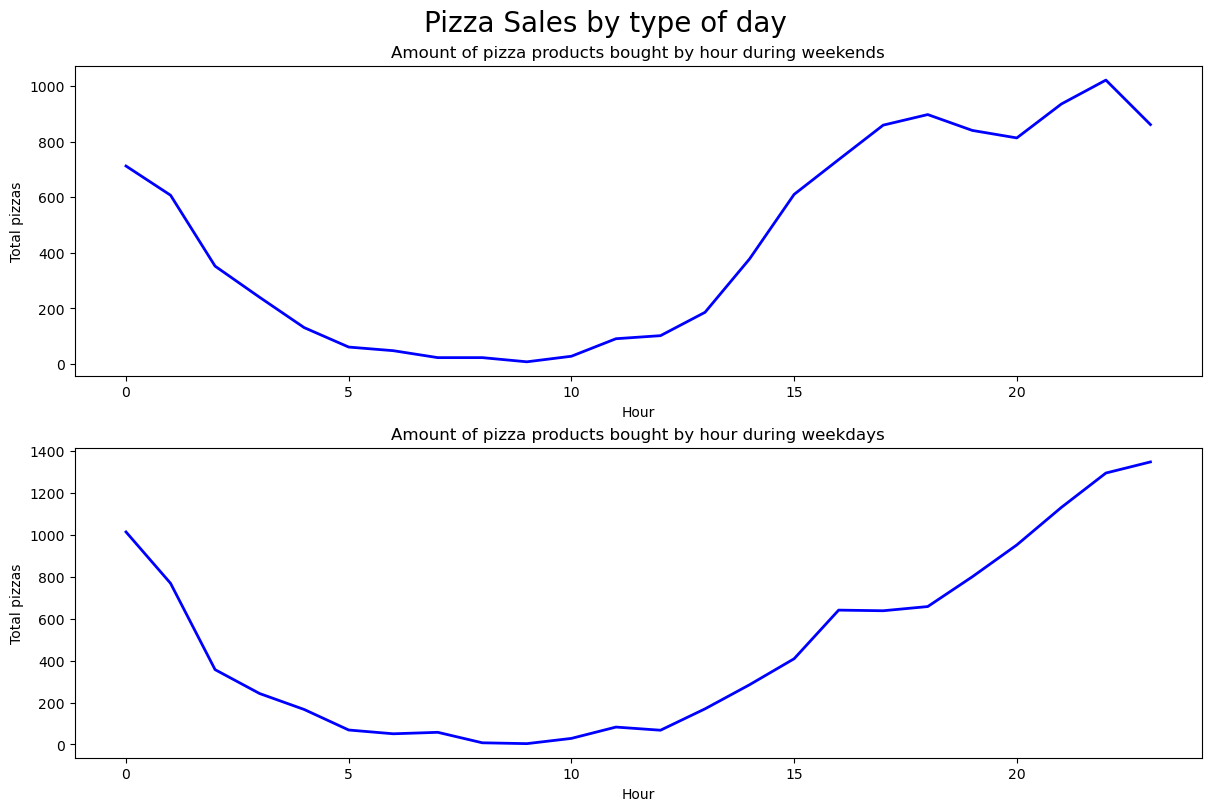

In [4]:
df['wdayn'] = pd.DatetimeIndex(df['transaction_timestamp']).dayofweek
df['wday'] = pd.DatetimeIndex(df['transaction_timestamp']).day_name()
df['hour'] = pd.DatetimeIndex(df['transaction_timestamp']).hour
fig, ax_array = plt.subplots(2, 1, figsize=(12, 8), constrained_layout=True) ;
ax1 = ax_array[0];
ax2 = ax_array[1] ;
df_days = df.groupby(['wdayn', 'wday', 'hour'], as_index=False).agg({'quantity': 'sum'}).sort_values('quantity')
weekends = df_days.loc[df_days['wdayn'] >= 4]
wkn = weekends.groupby(['hour'], as_index=False).agg({'quantity': 'sum'}).sort_values('hour')
weekdays = df_days.loc[df_days['wdayn'] < 4]
wdy = weekdays.groupby(['hour'], as_index=False).agg({'quantity': 'sum'}).sort_values('hour')
ax1.plot(
    'hour', 
    'quantity', 
    data= wkn,  
    color='blue',
    linewidth=2
    ) ;
ax1.set_title('Amount of pizza products bought by hour during weekends', size=12)
ax1.set_ylabel('Total pizzas')
ax1.set_xlabel('Hour');

ax2.plot(
    'hour', 
    'quantity', 
    data= wdy,  
    color='blue',
    linewidth=2
    ) ;
ax2.set_title('Amount of pizza products bought by hour during weekdays', size=12)
ax2.set_ylabel('Total pizzas')
ax2.set_xlabel('Hour');
fig.suptitle('Pizza Sales by type of day', fontsize=20);

Both weekends and weekdays have very similar time trends throughout the day. Both peak aroound hour 20. It is also interesting to see that both increase around 14:00.

## Products bought with Pizza
Many retailers want to learn which products are bought alongside a target product. In this case, we analyzed which products are purchased in the same cart with pizza. This can help management make decisions for marketing purposes.

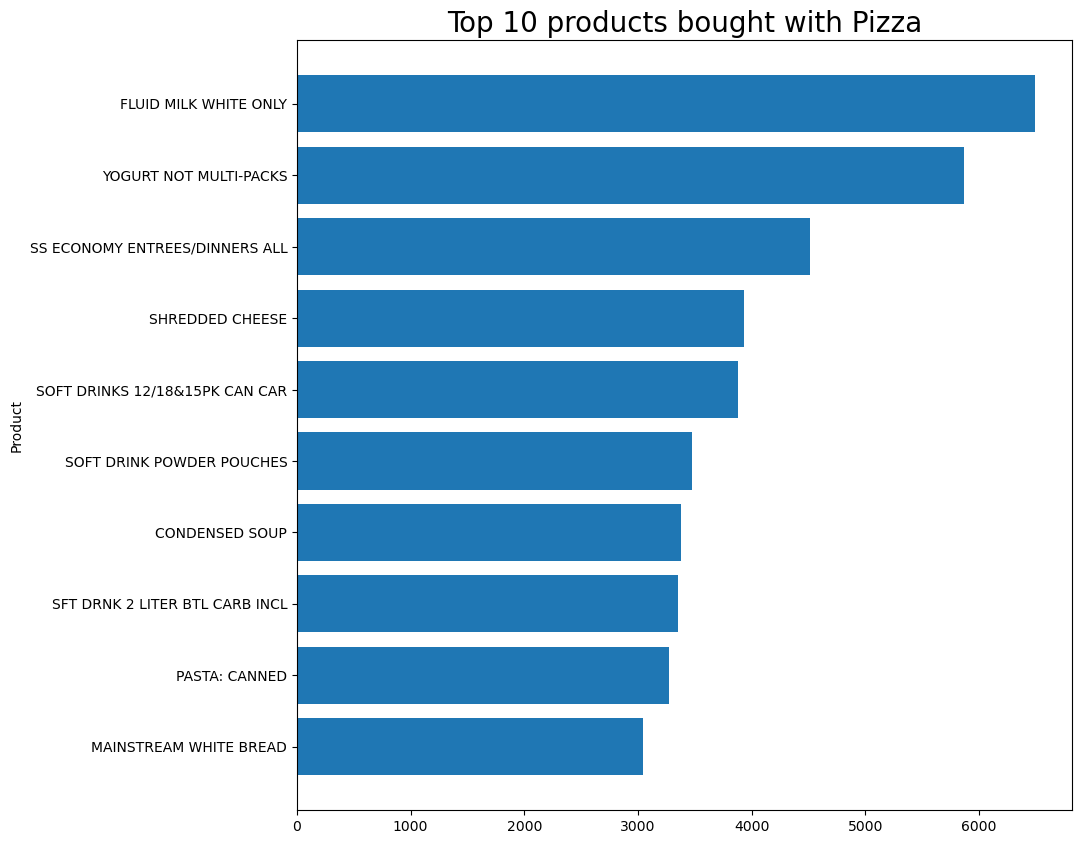

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
a = products.merge(transactions, how='inner', on='product_id')
pizza= a['product_type'].str.contains('pizza', case=False, na=False)
df = a[pizza]
bskt = df['basket_id']
type(bskt.to_numpy)
s = bskt.to_numpy()
b = a.loc[a['basket_id'].isin(s)]
no_pizza = b['product_type'].str.contains('pizza', case=False, na=False) == False
nope = b[no_pizza]
prods = nope.groupby(['product_type'], as_index=False).agg({'quantity': 'sum'}).sort_values('quantity')
prods = prods.tail(10)
plt.barh('product_type', width= 'quantity',data= prods)
ax.set_title('Top 10 products bought with Pizza', size=20)
ax.set_ylabel('Product');

Most of the affiliated products with pizza seem to be typical grocery items such as Milk, cheese and yogurt. What is also important to point out is the soft drink products affiliated with pizza.



# Demographics
Based on the information we have available, it is important to understand the profiles of the customers who are purchasing pizza in the United States. By using demographic data, we can help Regork more effectively and efficiently sell to the target customers, and it all starts by knowing who to sell to.

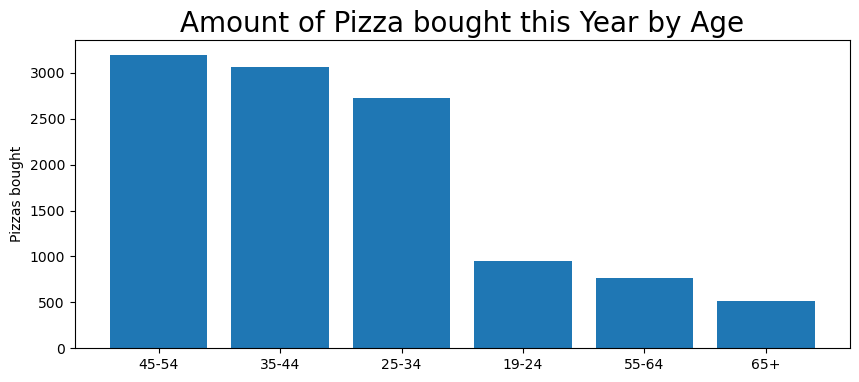

In [7]:
df = (demographics.merge(transactions, how='inner', on='household_id')
     .merge(products, how='inner', on='product_id'))
pizza= df['product_type'].str.contains('pizza', case=False, na=False)
df = df[pizza]
df = df.groupby('age', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
fig, ax = plt.subplots(figsize=(10, 4))
plt.bar('age', height= 'quantity',data= df)
ax.set_title('Amount of Pizza bought this Year by Age', size=20)
ax.set_ylabel('Pizzas bought');

We see that middle aged people often purchase more pizza more than any other demographic. Ages 25-54 dominate in pizza sales.

Now lets see when married and unmarried customers buy pizza. This will help us really narrow down the demograpic information.

In [9]:
df = (demographics.merge(transactions, how='inner', on='household_id')
     .merge(products, how='inner', on='product_id'))
pizza = df['product_type'].str.contains('pizza', case=False, na=False)
df = df[pizza]
df['day'] = pd.DatetimeIndex(df['transaction_timestamp']).dayofyear
df['month'] = pd.DatetimeIndex(df['transaction_timestamp']).month
df['mday'] = pd.DatetimeIndex(df['transaction_timestamp']).day
df = df.groupby(['day', 'marital_status','month','mday'], as_index=False).agg({'sales_value': 'sum'})
p = bokeh.plotting.figure(
    frame_width=700,
    frame_height=350,
    title='Pizza Sales Throughout the Year by Marital Status\nHover over points to see Month and Date',
    x_axis_label='Day',
    y_axis_label='Total Sales Value'
)

source = bokeh.models.ColumnDataSource(df)

# create color mapper
color_mapper = bokeh.transform.factor_cmap(
    'marital_status', 
    palette=['red', 'blue'], 
    factors=df['marital_status'].unique()
    )
     
p.scatter(
    source=source,
    x='day',
    y='sales_value',
    marker='circle',
    alpha=0.25,
    fill_color=color_mapper,
    line_color=color_mapper,
    legend_field='marital_status'
)

p.legend.title = "Marital Status"

p.yaxis.formatter = bokeh.models.NumeralTickFormatter(format="$,")
p.xaxis.formatter = bokeh.models.NumeralTickFormatter(format=",")

tooltips = [("sales_value","@sales_value"),("month","@month"),("mday","@mday")]
hover = bokeh.models.HoverTool(tooltips=tooltips, mode='mouse')
p.add_tools(hover)

bokeh.io.show(p)

We see that married couples purchase more pizza throughout the year. We also see the impact of holidays for pizza sales.

# Summary
### Problem Statement and Methodology
This analysis was intended to point out several trends in pizza sales data throughout 2017. We hope to provide recommendations to assist with profit growth. To succeed in this we observed and charted product correlation, date and time data, and demographic data.

### Observations
When looking at these three subjects I am able to make the following observations:

* Pizza is often bought in the Summer and Winter with sales declining during Spring
* There is a sharp incline in pizza sales starting at 2:00 until closing time when it comes to pizza sales for both the weekend and weekdays
* Three separate soda products have a high correlation with pizza sales
* Other related products are dairy products
* Ages 24-54 often buy a very large amount of pizza
* Married couples tend to buy more pizzas during a day by day bases
* There is a substantial increase in sales during holidays
### Recommendations
Based on these observations I have a few recommendations:

1. Regork needs to focus to increase pizza sales during the spring. They need to offer coupons with affiliated products like soda to increase sales during these slow periods
2. Regork should offer coupons to younger unmarried customers to increase sales in this area. The same should be offered towards older demographics past the age of 50.
3. In general, Regork needs to focus on emphasing customers to purchase products earlier. This will help with stocking and lines.
4. Regork could prepare for pizza sales and related products during holidays, so they are not short stocked.
# Conclusion and Limitations
One major limitation on this data is how old it is. This data was produced in 2017 and a lot has changed since then. Also, it would’ve been very beneficial for us to have access to store locations and product names and brands.This would allow us to be more specific in this analysis. Overall, despite these limitations we are happy with our analysis and recommendations.